In [1]:
import os
print(os.getcwd())

/workspace/projects/b99-errorAna


In [2]:
import pandas as pd 
pred_df = pd.read_csv('../b99-crossValidation/cv_pred.csv')

In [3]:
pred_df

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,pred
0,0,31,services,married,secondary,no,12294,yes,no,cellular,21,nov,101,3,498,0,other,0,0.070985
1,1,29,entrepreneur,single,tertiary,no,43027,no,no,cellular,22,aug,158,2,702,0,unknown,1,0.574833
2,2,35,management,married,tertiary,no,12252,yes,no,cellular,11,nov,351,1,826,0,failure,0,0.052495
3,3,31,technician,married,secondary,no,99121,yes,yes,unknown,16,may,658,2,120,0,failure,0,0.037465
4,4,48,unemployed,married,primary,no,42005,yes,no,telephone,3,apr,177,1,273,0,unknown,0,0.710186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27095,27095,37,blue-collar,married,secondary,no,26661,yes,no,cellular,27,may,345,4,425,0,unknown,0,0.030229
27096,27096,35,services,married,secondary,no,42150,yes,no,cellular,27,may,121,1,719,0,unknown,0,0.208148
27097,27097,35,services,married,unknown,no,34531,no,no,cellular,28,jun,177,2,121,0,unknown,0,0.480478
27098,27098,30,admin.,single,secondary,no,99621,yes,no,cellular,27,may,121,1,100,0,unknown,0,0.219874


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

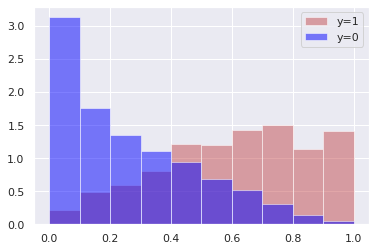

In [14]:
fig,axs = plt.subplots()
axs.hist(pred_df.loc[pred_df['y']==1,'pred'],
         bins=bins,
         color='r',
         alpha=0.5,
         density=True,
         label='y=1'
         )
axs.hist(pred_df.loc[pred_df['y']==0,'pred'],
         bins=bins,
         color='blue',
         alpha=0.5,
         density=True,
         label='y=0'
         )
axs.legend()

In [21]:
error_df = pred_df.loc[(pred_df['y']==0)&(pred_df['pred']>0.5),:]

In [22]:
error_df

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,pred
4,4,48,unemployed,married,primary,no,42005,yes,no,telephone,3,apr,177,1,273,0,unknown,0,0.710186
5,5,30,blue-collar,married,primary,no,-6160,no,no,cellular,18,aug,158,1,632,0,unknown,0,0.566844
8,8,32,admin.,single,secondary,no,7958,no,no,cellular,28,sep,101,1,525,0,success,0,0.961133
17,17,37,management,married,tertiary,no,79021,no,no,cellular,12,jul,158,1,102,0,unknown,0,0.775999
26,26,32,technician,married,secondary,no,41765,yes,yes,cellular,17,apr,198,1,544,0,unknown,0,0.678322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27077,27077,32,unemployed,single,secondary,no,59177,no,no,cellular,4,apr,161,4,843,0,unknown,0,0.701953
27084,27084,28,self-employed,single,tertiary,no,3856,no,no,cellular,20,aug,158,3,220,0,unknown,0,0.512990
27088,27088,29,admin.,single,secondary,no,38024,no,no,cellular,27,may,177,3,159,0,unknown,0,0.624319
27093,27093,60,unemployed,single,tertiary,no,72292,no,no,cellular,30,aug,158,1,572,0,unknown,0,0.710115
